1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

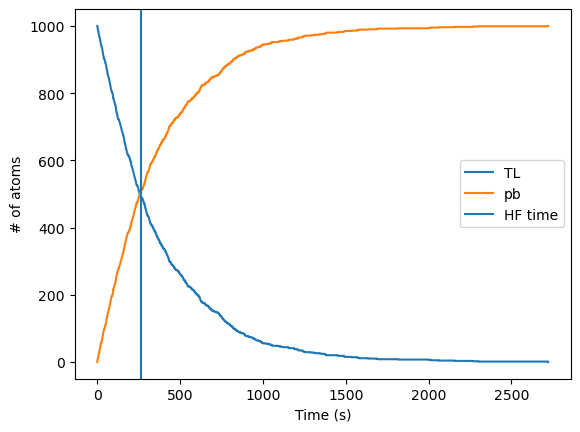

In [7]:
import numpy as np
import matplotlib.pyplot as plt

thallium = [1000]
lead = [0]
tau = (3.052 *60)/np.log(2)

def p(t):
    return 1 - (2**(-(t/tau)))

t = 0
dt = 1

while thallium[-1] != 0:
    t += dt
    n_decay = int(np.sum(np.random.uniform(0,1, thallium[-1])< p(dt)))
    thallium.append(thallium[-1] - n_decay)
    
thallium = np.array(thallium)
lead = thallium[0] - thallium
time = np.arange(0, t+dt, dt)

plt.plot(time, thallium, label = 'TL')
plt.plot(time, lead, label = 'pb')
plt.axvline(tau, label='HF time')
plt.xlabel('Time (s)')
plt.ylabel('# of atoms')
plt.legend()
plt.show()
    



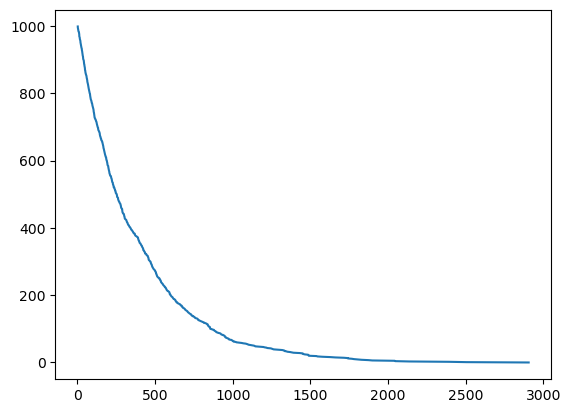

In [13]:
from scipy.optimize import brentq

def p2(t):
    return 2**(-t/tau)* np.log(2)/tau

def icdf(z):
    return (-tau) * np.log2(1 - z)

#def icdf2(t):
#   return brentq(lambda x: p2(x) -t, 0,1)


times = []

for atom in range(0, thallium[0]):
    t = icdf(np.random.uniform(0,1))
    times.append(t)
    
times = np.sort(np.array(times))
times = times[::-1]

plt.plot(times, range(0, thallium[0]))
    

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [14]:
#Declaring all costants
Z = 79
e = -1.60e-19
epsilon0 = 8.85e-12
E = 7.7 * abs(e) * 10**(6)   #Converting it to joules
a0 = 5.29e-11

#Computing the beam as a 2D gaussian distribution
N = int(1e6)
sigma = a0 / 100

x, y = np.random.normal(0, sigma, N), np.random.normal(0, sigma, N)
b = np.sqrt(x**2 + y**2)

#Counting how many particles are bounced back
backscattering = np.sum(b < ((Z*e*e) / (2*np.pi*epsilon0*E)))

print(f"The particles that are bounced back are {backscattering} over {N}: {backscattering / N * 100:.2f}%")


The particles that are bounced back are 1553 over 1000000: 0.16%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [15]:
def f(x):
    return (np.sin(1 / (x * (2 - x)))) ** 2

N = int(1e6)

#Monte Carlo method

n_simulations = [10, 20, 50, 100]

x_min, x_max = 0.001, 1.999   #x=0 and x=2 are not in the domain of f(x)
y_min, y_max = 0, 1           #f(x) is a squared sine function, so it's limited between 0 and 1

for n in n_simulations:

    areas = []

    for _ in range(n):
    
        x = np.random.uniform(x_min, x_max, N)
        y = np.random.uniform(y_min, y_max, N)
        hits = np.sum(y < f(x))
    
        monte_carlo_area = (hits * abs(x_max - x_min) * abs(y_max - y_min)) / N
        areas.append(monte_carlo_area)
    
    area = np.mean(areas)
    error = np.std(areas) / np.sqrt(n)

    print(f"Area with the Monte Carlo method ({n} simulations): {area} ± {error}")

#Mean value method

x = np.random.uniform(x_min, x_max, N)
    
area = (abs(x_max - x_min) / N) * np.sum(f(x))
error = np.std(f(x)) / np.sqrt(N)
    
print(f"Area with the mean value method: {area} ± {error}")

Area with the Monte Carlo method (10 simulations): 1.4507821656000002 ± 0.0002802147524838652
Area with the Monte Carlo method (20 simulations): 1.4503065417 ± 0.00022845853476471842
Area with the Monte Carlo method (50 simulations): 1.4504873007599999 ± 8.837520372210797e-05
Area with the Monte Carlo method (100 simulations): 1.45037411406 ± 8.40612689823476e-05
Area with the mean value method: 1.4510639387684747 ± 0.0002633284502298753


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [17]:
#Area of a circle
def f(x, y, r):
    z = (x*x) + (y*y)
    return 1 if z <= r**2 else 0

N = int(1e6)
r = 1

x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

hits = np.sum(np.array([f(x_i, y_i, r) for x_i, y_i in zip(x, y)]))
area = (hits * (2*r) ** 2)/ N
print("Area of circle:", area)

#Generalizing for a 10D sphere

def f(v, r):
    squared_sum = np.sum(v**2)
    return 1 if squared_sum <= r**2 else 0

dim = 10
        
vectors = np.random.uniform(-1, 1, size = (dim, N))   #dim rows and N columns; each row are N random numbers, each column is a vector of dimension dim
hits = 0

for i in range(N):
    v = vectors[:, i]   #Columns of the matrix
    hits += f(v, r)
    
area = (hits * (2*r) ** dim) / N
print("Area of 10D sphere:", area)

Area of circle: 3.138548
Area of 10D sphere: 2.445312


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [18]:
def f(x):
    return 1 / (np.sqrt(x) * (np.exp(x) + 1))

def w(x):
    return 1 / np.sqrt(x)

def icdf(z):
    return (z*z) / 4

#Random points drew from w(x)
N = int(1e6)
a = 0
b = 1
x = icdf(np.random.uniform(a, b, N))

points = np.random.uniform(a, b, N)
w_integral = ((b - a) / N) * np.sum(w(points))

I = (1 / N) * np.sum(f(x) / w(x)) * w_integral
print("I =", I)



def icdf_without_quarter_factor(z):
    return z*z

x = icdf_without_quarter_factor(np.random.uniform(a, b, N))
I = (1 / N) * np.sum(f(x) / w(x)) * w_integral
print("I =", I)



I = 0.9633183944870312
I = 0.8431854535565897
